In [58]:
%run ct_include.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import seaborn as sns

sns.set()

### Plot attenuation Coeffs

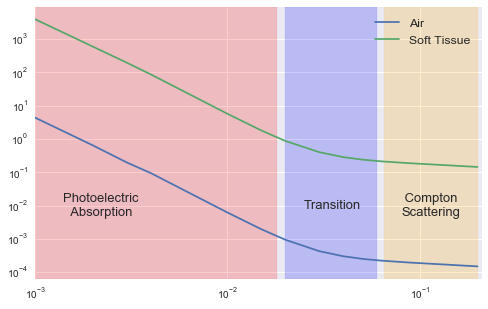

In [352]:
# plot(material_data.mev, material_data.coeffs('Aluminium'))
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.set_xscale('log')
ax.set_yscale('log')

plt.axvspan(1e-3, 1.8e-2, color='red', alpha=0.2)
plt.axvspan(2e-2, 6e-2, color='blue', alpha=0.2)
plt.axvspan(6.5e-2, 2e-1, color='orange', alpha=0.2)

# ax.plot(material_data.mev, material_data.coeff('Aluminium'))
ax.plot(material_data.mev, material_data.coeff('Air'), label='Air')
# ax.plot(material_data.mev, material_data.coeff('Bone'), label='Blood')
ax.plot(material_data.mev, material_data.coeff('Soft Tissue'), label='Soft Tissue')

ax.text(1.4e-3, 5e-3, 'Photoelectric\n  Absorption', fontsize=13)
ax.text(2.5e-2, 8e-3, 'Transition', fontsize=13)
ax.text(8e-2, 5e-3, ' Compton\nScattering', fontsize=13)

ax.set_xlim(1e-3, 2.1e-1)
plt.legend(fontsize=12.3, loc='upper right');

## 1

Scanning angle: 32   
Scanning angle: 128   
Scanning angle: 32   
Scanning angle: 128   
Scanning angle: 32   
Scanning angle: 128   


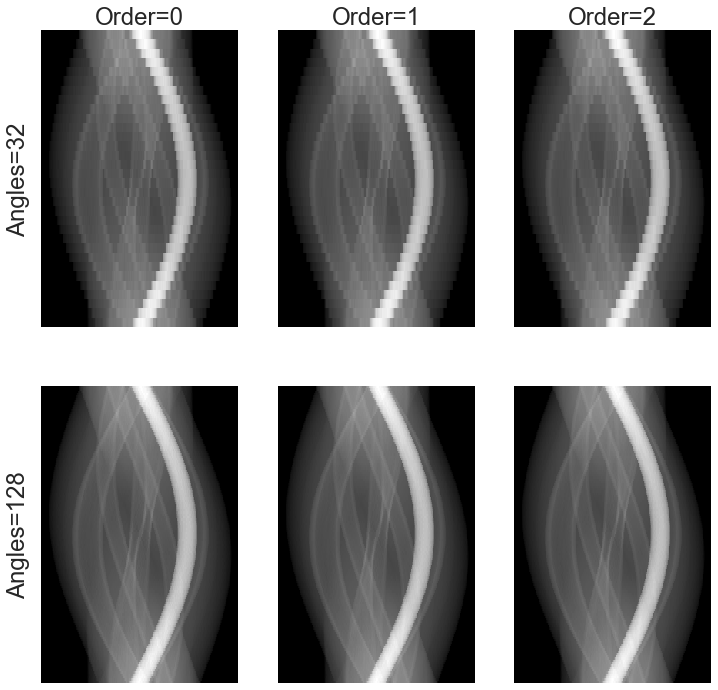

In [211]:
n_angles=[32,128]
orders=[0, 1, 2]
size=256
scale=0.1
fig, ax = plt.subplots(nrows=len(n_angles), ncols=len(orders))
fig.set_size_inches(12,12)

photon_source = source_data.photons[1]

for order in range(len(orders)):
    for angle in range(len(n_angles)):
        phantom = ct_phantom(material_data.names, size, 3, 'Titanium',)
        image = ct_scan(photon_source, material_data, phantom, 0.1, n_angles[angle], interpolation_order=orders[order])
        image = ct_calibrate(photon_source, material_data, image, scale)
#         ax[size, angle].axis('off') # no axes
        
        ax[angle,order].set_yticklabels([])
        ax[angle,order].set_xticklabels([])
        ax[angle,order].grid(False)
        im = ax[angle,order].imshow(image, cmap='gray', interpolation='nearest', aspect='auto')
        
#         ax[order, angle].set_aspect('equal')

        #add colorbar
#         fig.colorbar(im, orientation='vertical', ax=ax[size,angle])


for angle in range(len(n_angles)):
    ax[angle, 0].set_ylabel(f'Angles={n_angles[angle]}', fontsize=24)

for order in range(len(orders)):
    ax[0, order].set_title(f'Order={orders[order]}', fontsize=24);

### Effect of interpolation

In [270]:
n_angles=[64,128,512]
sizes=[64, 128, 256]
scale=0.1
source_nonideal = fake_source(material_data.mev, 0.12, material_data.coeff("Aluminium"), 1, method='ideal')

phantom = ct_phantom(material_data.names, 128, 3, 'Titanium')
phantom_nonideal = np.zeros(phantom.shape,dtype=np.float32)
for j, row in enumerate(phantom):
    for k, val in enumerate(row):
        phantom_nonideal[j][k] = np.dot(material_data.coeffs[int(val)], source_nonideal)/np.sum(source_nonideal)
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 128,
                             interpolation_order=0, model_noise=False)
image = np.where(image == -1.0, 0., image)
# ax.set_aspect('equal', 'datalim')

Scanning angle: 128   
Ramp filtering...
Reconstructing angle: 128   


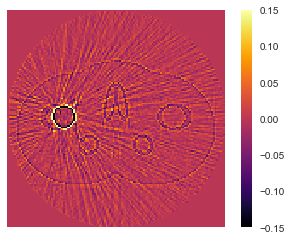

In [271]:
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image - phantom_nonideal, cmap='inferno', vmin=-0.15, vmax=0.15) 
prev = image- phantom_nonideal
fig.colorbar(im)

Scanning angle: 128   
Ramp filtering...
Reconstructing angle: 128   


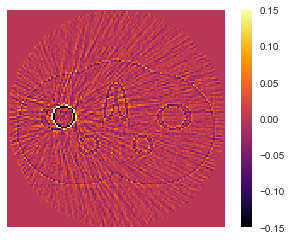

In [272]:
# fig, ax = plt.subplots()

image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 128,
                             interpolation_order=1, model_noise=False)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image - phantom_nonideal, cmap='inferno', vmin=-0.15, vmax=0.15)  
fig.colorbar(im)

Scanning angle: 128   
Ramp filtering...
Reconstructing angle: 128   


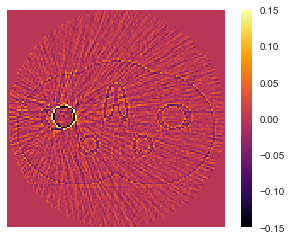

In [273]:
# fig, ax = plt.subplots()

image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 128,
                             interpolation_order=2, model_noise=False)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image - phantom_nonideal, cmap='inferno', vmin=-0.15, vmax=0.15)  
fig.colorbar(im)

## Effect of alpha

Scanning angle: 128   
Ramp filtering...
Reconstructing angle: 128   


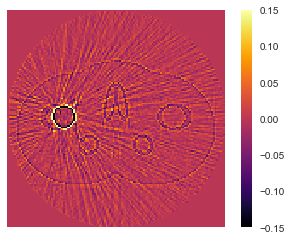

In [275]:
# fig, ax = plt.subplots()

image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 128,
                             interpolation_order=0, model_noise=False, alpha=0.001)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image - phantom_nonideal, cmap='inferno', vmin=-0.15, vmax=0.15)  
fig.colorbar(im)

Scanning angle: 128   
Ramp filtering...
Reconstructing angle: 128   


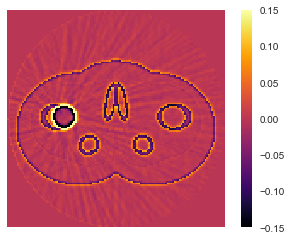

In [279]:
# fig, ax = plt.subplots()

image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 128,
                             interpolation_order=0, model_noise=False, alpha=10.0)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image - phantom_nonideal, cmap='inferno', vmin=-0.15, vmax=0.15)  
fig.colorbar(im)

# Effect of noise

In [355]:
phantom = ct_phantom(material_data.names, 256, 4, 'Titanium')
phantom_nonideal = np.zeros(phantom.shape,dtype=np.float32)
for j, row in enumerate(phantom):
    for k, val in enumerate(row):
        phantom_nonideal[j][k] = np.dot(material_data.coeffs[int(val)], source_nonideal)/np.sum(source_nonideal)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


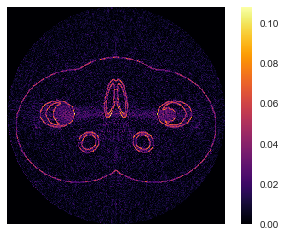

In [343]:
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 256,
                             interpolation_order=0, model_noise=True,
                            fixed_noise_level=1e8, scatter_noise_level=1e-3,
                            mas=1e3 )
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(np.abs(image - phantom_nonideal), cmap='inferno', vmin=0.)  
fig.colorbar(im)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


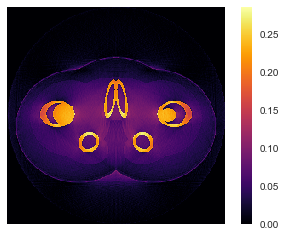

In [348]:
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 256,
                             interpolation_order=0, model_noise=True,
                            fixed_noise_level=1e8, scatter_noise_level=1e-3,
                            mas=1e1)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(np.abs(image - phantom_nonideal), cmap='inferno', vmin=0.)  
fig.colorbar(im)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


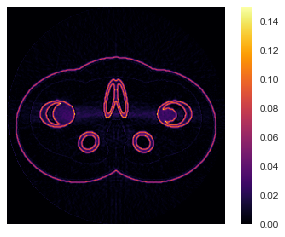

In [349]:
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 256,
                             interpolation_order=0, model_noise=True,
                            fixed_noise_level=1e8, scatter_noise_level=1e-3,
                            mas=1e3, alpha=10.0)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(np.abs(image - phantom_nonideal), cmap='inferno', vmin=0., vmax=0.15)  
fig.colorbar(im)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


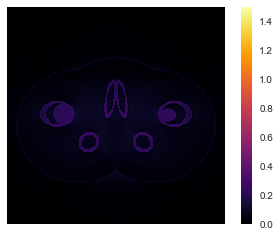

In [346]:
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 256,
                             interpolation_order=0, model_noise=True,
                            fixed_noise_level=1e8, scatter_noise_level=1e-3,
                            mas=1e1, alpha=10.0)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(np.abs(image - phantom_nonideal), cmap='inferno', vmin=0., vmax=1.5)  
fig.colorbar(im)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


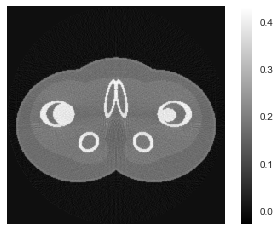

In [353]:
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 256,
                             interpolation_order=0, model_noise=True,
                            fixed_noise_level=1e8, scatter_noise_level=1e-3,
                            mas=1e3 )
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image, cmap='gray')  
fig.colorbar(im)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


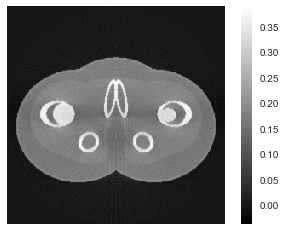

In [354]:
image = scan_and_reconstruct(source_nonideal, material_data, phantom, scale, 256,
                             interpolation_order=0, model_noise=True,
                            fixed_noise_level=1e7, scatter_noise_level=1e-3,
                            mas=1e1)
image = np.where(image == -1.0, 0., image)
fig, ax = plt.subplots()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
im = ax.imshow(image, cmap='gray')  
fig.colorbar(im)

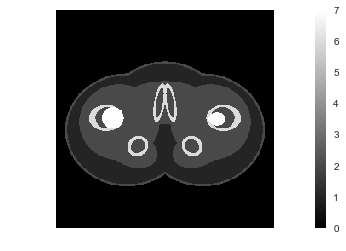

In [155]:
phantom = ct_phantom(material_data.names, 256, 4, 'Titanium')

ideal_source = fake_source(material_data.mev, 0.12, material_data.coeff("Aluminium"), 1, method='ideal')
nonideal_source = fake_source(material_data.mev, 0.12, material_data.coeff("Aluminium"), 1)
nonideal_source_low = fake_source(material_data.mev, 0.08, material_data.coeff("Aluminium"), 1)
draw(phantom)

In [206]:
scale = 0.15
angles = 128
# sinogram = ct_scan(photon_source, material_data, phantom, scale, 256, interpolation_order=1)
# draw(sinogram)

In [64]:
total_attenuation = ct_calibrate(photon_source, material_data, sinogram, scale)

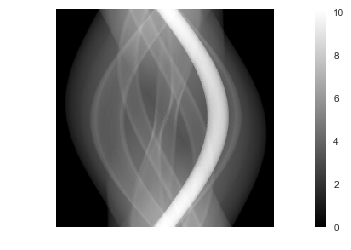

In [65]:
draw(total_attenuation)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


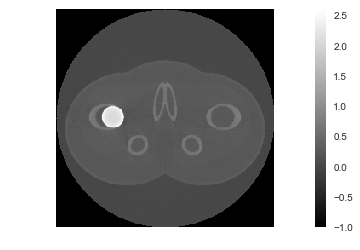

In [66]:
reconstruction = scan_and_reconstruct(photon_source, material_data, phantom, 0.1, 256)
draw(reconstruction)

In [67]:
y = ramp_filter(np.array([1] + [0] * 255).reshape([1, 256]), scale=0.1)

Ramp filtering...


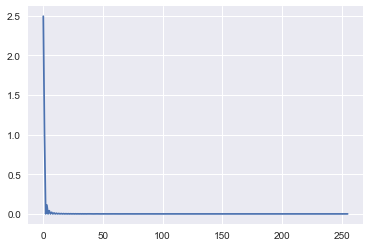

In [68]:
plt.plot(np.arange(256), np.abs(y).ravel())

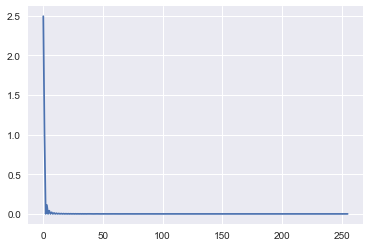

In [69]:
plot(np.abs(y.ravel()))

In [70]:
from ramp_filter import get_ramlak

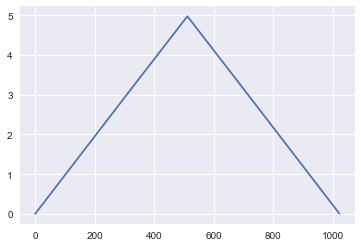

In [71]:
plot(get_ramlak(0.1, 1024, 0.01))

In [146]:
get_ramlak(0.1, 1024, 0.001)

array([0.00488281, 0.00976562, 0.01953125, ..., 0.01953125, 0.00976562,
       0.00488281], dtype=float32)

In [195]:
phantom = ct_phantom(material_data.names, 256, 4, 'Titanium')
reconstruction1 = scan_and_reconstruct(ideal_source, material_data, phantom, scale, angles, mas=100000,
                                      model_noise=True, scatter_noise_level=1e-4, fixed_noise_level=600)
reconstruction2 = scan_and_reconstruct(ideal_source, material_data, phantom, scale, angles, mas=1,
                                      model_noise=True, scatter_noise_level=1e-4, fixed_noise_level=600)


Scanning angle: 124   
Ramp filtering...
Reconstructing angle: 124   
Scanning angle: 124   
Ramp filtering...
Reconstructing angle: 124   


In [182]:
reconstruction3 = scan_and_reconstruct(ideal_source, material_data, phantom, 0.6, angles, mas=100000,
                                      model_noise=True, scatter_noise_level=1e-3, fixed_noise_level=600)

Scanning angle: 124   
Ramp filtering...
Reconstructing angle: 124   


[]

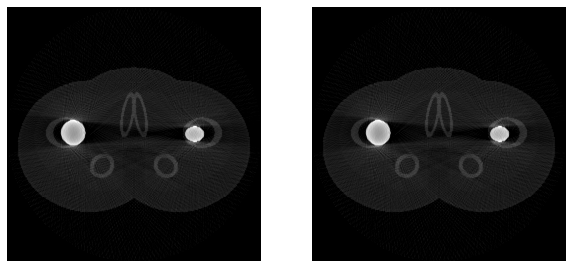

In [196]:

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 6)
im = ax.imshow(reconstruction1, vmin=0., cmap='gray')
im = ax2.imshow(reconstruction2, vmin=0., cmap='gray')
ax.grid(False)
ax2.grid(False)
ax.set_xticklabels([])
ax2.set_xticklabels([])

ax.set_yticklabels([])
ax2.set_yticklabels([])
# ax.colorbar(im)

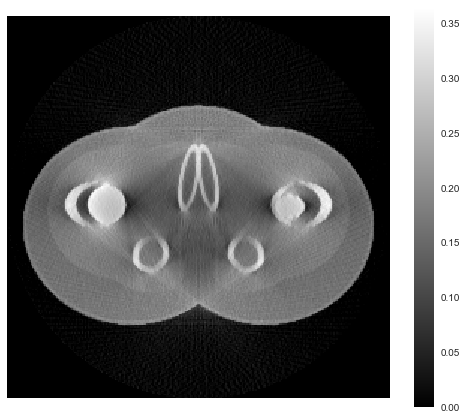

In [184]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
im = ax.imshow(reconstruction2, vmin=0., cmap='gray')
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.colorbar(im)
plt.tight_layout()
fig.savefig('noisy-scale02-mas1e1.png', bbox_inches='tight')

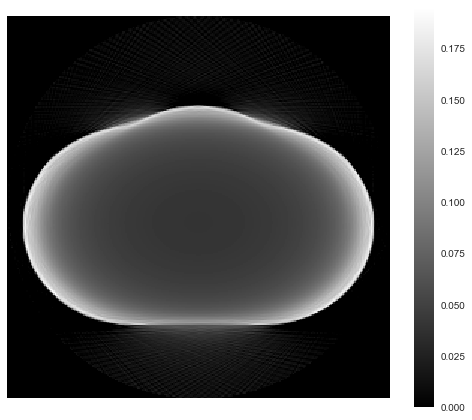

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
im = ax.imshow(reconstruction3, vmin=0., cmap='gray')
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.colorbar(im)
plt.tight_layout()
fig.savefig('noisy-scale06-mas1e5.png', bbox_inches='tight')

### Now for the variance and error


In [180]:
phantom = ct_phantom(material_data.names, 256, 4, 'Aluminium')
reconstruction11 = scan_and_reconstruct(ideal_source, material_data, phantom, scale, angles, mas=100000,
                                      model_noise=True, scatter_noise_level=1e-3, fixed_noise_level=600)
reconstruction12 = scan_and_reconstruct(ideal_source, material_data, phantom, scale, angles, mas=100000,
                                      model_noise=True, scatter_noise_level=1e-3, fixed_noise_level=600)
reconstruction13 = scan_and_reconstruct(ideal_source, material_data, phantom, scale, angles, mas=100000,
                                      model_noise=True, scatter_noise_level=1e-3, fixed_noise_level=600)

ideal_reconstruction1 = scan_and_reconstruct(ideal_source, material_data, phantom, scale, angles, mas=100000,
                                      model_noise=False, scatter_noise_level=1e-3, fixed_noise_level=600)

Scanning angle: 124   
Ramp filtering...
Reconstructing angle: 124   


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
